# Decision trees

## Regression trees

In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import graphviz

%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import confusion_matrix, mean_squared_error

In [3]:
# import dataset
g1_df = pd.read_csv('student-mat.csv', delimiter = ';')
g1_df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [4]:
# missing values
pd.isnull(g1_df).sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [5]:
g1_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [6]:
g1_df['studytime'].unique()

array([2, 3, 1, 4], dtype=int64)

In [7]:
# categorical variables
g1_df['Medu'] = g1_df.Medu.astype('object')
g1_df['Fedu'] = g1_df.Fedu.astype('object')
g1_df['traveltime'] = g1_df.traveltime.astype('object')
g1_df['studytime'] = g1_df.studytime.astype('object')
g1_df['famrel'] = g1_df.famrel.astype('object')
g1_df['freetime'] = g1_df.freetime.astype('object')
g1_df['goout'] = g1_df.goout.astype('object')
g1_df['Dalc'] = g1_df.Dalc.astype('object')
g1_df['Walc'] = g1_df.Walc.astype('object')
g1_df['health'] = g1_df.health.astype('object')

In [8]:
g1_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    object
 7   Fedu        395 non-null    object
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    object
 13  studytime   395 non-null    object
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [9]:
# Select the categorical columns to encode
categorical_cols = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 
                    'traveltime', 'studytime', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 
                    'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health']

g1_data = pd.get_dummies(g1_df, columns = categorical_cols)

C:\Users\User\anaconda3\lib\site-packages\pandas\core\algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


In [10]:
g1_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 97 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   age                395 non-null    int64
 1   failures           395 non-null    int64
 2   absences           395 non-null    int64
 3   G1                 395 non-null    int64
 4   G2                 395 non-null    int64
 5   G3                 395 non-null    int64
 6   school_GP          395 non-null    uint8
 7   school_MS          395 non-null    uint8
 8   sex_F              395 non-null    uint8
 9   sex_M              395 non-null    uint8
 10  address_R          395 non-null    uint8
 11  address_U          395 non-null    uint8
 12  famsize_GT3        395 non-null    uint8
 13  famsize_LE3        395 non-null    uint8
 14  Pstatus_A          395 non-null    uint8
 15  Pstatus_T          395 non-null    uint8
 16  Medu_0             395 non-null    uint8
 17  Medu_1          

In [11]:
# x and y 
X = g1_data.drop(['G1', 'G2', 'G3'], axis=1)  
y = g1_data.G1   
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 1)

In [12]:
X

,age,failures,absences,school_GP,school_MS,sex_F,sex_M,address_R,address_U,famsize_GT3,...,Walc_1,Walc_2,Walc_3,Walc_4,Walc_5,health_1,health_2,health_3,health_4,health_5
0,18,0,6,1,0,1,0,0,1,1,...,1,0,0,0,0,0,0,1,0,0
1,17,0,4,1,0,1,0,0,1,1,...,1,0,0,0,0,0,0,1,0,0
2,15,3,10,1,0,1,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0
3,15,0,2,1,0,1,0,0,1,1,...,1,0,0,0,0,0,0,0,0,1
4,16,0,4,1,0,1,0,0,1,1,...,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,20,2,11,0,1,0,1,0,1,0,...,0,0,0,0,1,0,0,0,1,0
391,17,0,3,0,1,0,1,0,1,0,...,0,0,0,1,0,0,1,0,0,0
392,21,3,3,0,1,0,1,1,0,1,...,0,0,1,0,0,0,0,1,0,0
393,18,0,0,0,1,0,1,1,0,0,...,0,0,0,1,0,0,0,0,0,1


In [13]:
y

0       5
1       5
2       7
3      15
4       6
       ..
390     9
391    14
392    10
393    11
394     8
Name: G1, Length: 395, dtype: int64

In [14]:
# find for the optimal maximum depth 
# define the maximum depth range
n = 6

L = []

for i in range(1, n):
    dtree = DecisionTreeRegressor(max_depth = i, random_state = 1)
    dtree.fit(X_train, y_train)
    y_pred = dtree.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    L.append(mse)

# Find the index of the lowest MSE and add 1 
best_max_depth = np.argmin(L) + 1
best_mse = min(L)

print("Best Max Depth:", best_max_depth)
print("Best MSE:", best_mse)

Best Max Depth: 2
Best MSE: 7.4594640215069905


In [15]:
# choosing max depth 2
regr_tree_g1 = DecisionTreeRegressor(max_depth = 2, random_state = 1)
regr_tree_g1.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=2, random_state=1)

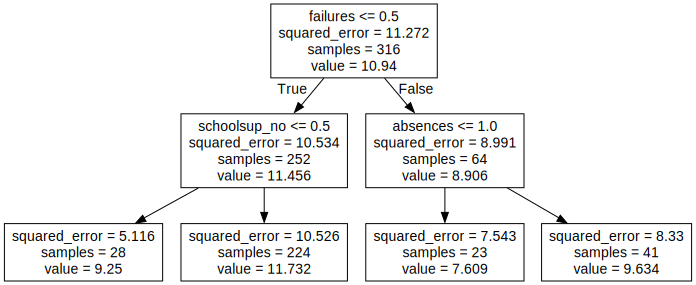

In [16]:
export_graphviz(regr_tree_g1, 
                out_file = "g1_tree.dot", 
                feature_names = X_train.columns)

with open("g1_tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [17]:
g1_df['failures'].unique()

array([0, 3, 2, 1], dtype=int64)

7.4594640215069905

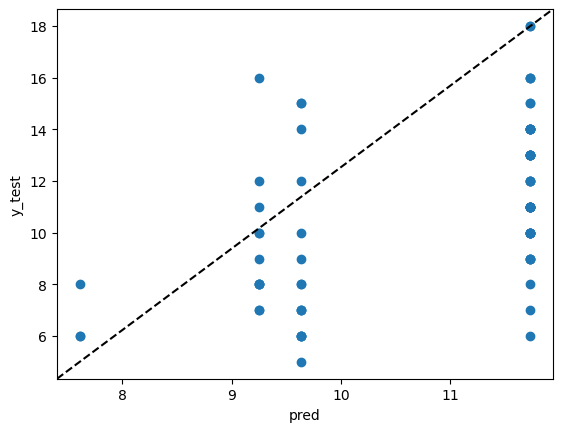

In [18]:
pred = regr_tree_g1.predict(X_test)

plt.scatter(pred, 
            y_test, 
            label = 'G1')

plt.plot([0, 1], 
         [0, 1], 
         '--k', 
         transform = plt.gca().transAxes)

plt.xlabel('pred')
plt.ylabel('y_test')

mean_squared_error(y_test, pred)

## Classification trees

In [19]:
# import dataset
g2_df = pd.read_csv('student-mat.csv', delimiter = ';')
g2_df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [20]:
# categorical variables
g2_df['Medu'] = g2_df.Medu.astype('object')
g2_df['Fedu'] = g2_df.Fedu.astype('object')
g2_df['traveltime'] = g2_df.traveltime.astype('object')
g2_df['studytime'] = g2_df.studytime.astype('object')
g2_df['failures'] = g2_df.studytime.astype('object')
g2_df['famrel'] = g2_df.famrel.astype('object')
g2_df['freetime'] = g2_df.freetime.astype('object')
g2_df['goout'] = g2_df.goout.astype('object')
g2_df['Dalc'] = g2_df.Dalc.astype('object')
g2_df['Walc'] = g2_df.Walc.astype('object')
g2_df['health'] = g2_df.health.astype('object')

In [21]:
g2_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    object
 7   Fedu        395 non-null    object
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    object
 13  studytime   395 non-null    object
 14  failures    395 non-null    object
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [22]:
# Select the categorical columns to encode
categorical_cols = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 
                    'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 
                    'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health']

g2_data = pd.get_dummies(g2_df, columns = categorical_cols)

C:\Users\User\anaconda3\lib\site-packages\pandas\core\algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


In [23]:
g2_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 100 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   age                395 non-null    int64
 1   absences           395 non-null    int64
 2   G1                 395 non-null    int64
 3   G2                 395 non-null    int64
 4   G3                 395 non-null    int64
 5   school_GP          395 non-null    uint8
 6   school_MS          395 non-null    uint8
 7   sex_F              395 non-null    uint8
 8   sex_M              395 non-null    uint8
 9   address_R          395 non-null    uint8
 10  address_U          395 non-null    uint8
 11  famsize_GT3        395 non-null    uint8
 12  famsize_LE3        395 non-null    uint8
 13  Pstatus_A          395 non-null    uint8
 14  Pstatus_T          395 non-null    uint8
 15  Medu_0             395 non-null    uint8
 16  Medu_1             395 non-null    uint8
 17  Medu_2         

In [24]:
g2_data['G2'].unique()

array([ 6,  5,  8, 14, 10, 15, 12, 18, 16, 13,  9, 11,  7, 19, 17,  4,  0],
      dtype=int64)

In [25]:
# Define the function to map G2 values to categories
def map_grade_category(value):
    if value >= 0 and value <= 4:
        return 'E'
    elif value >= 5 and value <= 8:
        return 'D'
    elif value >= 9 and value <= 12:
        return 'C'
    elif value >= 13 and value <= 16:
        return 'B'
    else:
        return 'A'

# Apply the mapping function to create the new variable G2T
g2_data['G2T'] = g2_data['G2'].map(map_grade_category)

# Print the transformed variable
print(g2_data['G2T'])

0      D
1      D
2      D
3      B
4      C
      ..
390    C
391    B
392    D
393    C
394    C
Name: G2T, Length: 395, dtype: object


In [26]:
g2_data.head()

,age,absences,G1,G2,G3,school_GP,school_MS,sex_F,sex_M,address_R,...,Walc_2,Walc_3,Walc_4,Walc_5,health_1,health_2,health_3,health_4,health_5,G2T
0,18,6,5,6,6,1,0,1,0,0,...,0,0,0,0,0,0,1,0,0,D
1,17,4,5,5,6,1,0,1,0,0,...,0,0,0,0,0,0,1,0,0,D
2,15,10,7,8,10,1,0,1,0,0,...,0,1,0,0,0,0,1,0,0,D
3,15,2,15,14,15,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,B
4,16,4,6,10,10,1,0,1,0,0,...,1,0,0,0,0,0,0,0,1,C


In [27]:
# x and y variables
X = g2_data.drop(['G1', 'G2', 'G3', 'G2T'], axis=1)  
y = g2_data.G2T   
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, train_size = 0.8, random_state = 1)

In [28]:
X

,age,absences,school_GP,school_MS,sex_F,sex_M,address_R,address_U,famsize_GT3,famsize_LE3,...,Walc_1,Walc_2,Walc_3,Walc_4,Walc_5,health_1,health_2,health_3,health_4,health_5
0,18,6,1,0,1,0,0,1,1,0,...,1,0,0,0,0,0,0,1,0,0
1,17,4,1,0,1,0,0,1,1,0,...,1,0,0,0,0,0,0,1,0,0
2,15,10,1,0,1,0,0,1,0,1,...,0,0,1,0,0,0,0,1,0,0
3,15,2,1,0,1,0,0,1,1,0,...,1,0,0,0,0,0,0,0,0,1
4,16,4,1,0,1,0,0,1,1,0,...,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,20,11,0,1,0,1,0,1,0,1,...,0,0,0,0,1,0,0,0,1,0
391,17,3,0,1,0,1,0,1,0,1,...,0,0,0,1,0,0,1,0,0,0
392,21,3,0,1,0,1,1,0,1,0,...,0,0,1,0,0,0,0,1,0,0
393,18,0,0,1,0,1,1,0,0,1,...,0,0,0,1,0,0,0,0,0,1


In [29]:
y

0      D
1      D
2      D
3      B
4      C
      ..
390    C
391    B
392    D
393    C
394    C
Name: G2T, Length: 395, dtype: object

In [30]:
# find for the optimal maximum depth 
from sklearn.metrics import accuracy_score

# define the maximum depth range
n = 6

L = []

for i in range(1,n):
    ctree = DecisionTreeClassifier(max_depth = i, random_state = 1)
    ctree.fit(X_train2, y_train2)
    y_pred2 = ctree.predict(X_test2)
    L.append(round(accuracy_score(y_test2, y_pred2), 4))

# indexing problem so need to plus one 
best_max_depth = L.index(max(L)) + 1
best_accuracy = max(L)

print("Best Max Depth:", best_max_depth)
print("Best Accuracy:", best_accuracy)

Best Max Depth: 1
Best Accuracy: 0.5696


In [31]:
classification_tree_g2 = DecisionTreeClassifier(max_depth = 1, random_state = 1)
classification_tree_g2.fit(X_train2, y_train2)
classification_tree_g2.score(X_train2, y_train2)

0.40189873417721517

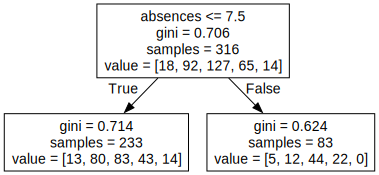

In [32]:
# export the output
export_graphviz(classification_tree_g2, 
                out_file = "g2_tree.dot", 
                feature_names = X_train2.columns)

with open("g2_tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [33]:
# the output is too big and it is hard to read since it is too big and i need to scroll here and there
# to overcome, we can export it as a png
from subprocess import check_call
check_call(['dot','-Tpng','g2_tree.dot','-o','g2_tree.png'])

0

In [34]:
y_train2.value_counts()

C    127
B     92
D     65
A     18
E     14
Name: G2T, dtype: int64

In [35]:
print("Shape of y_test2:", y_test2.shape)
print("Shape of pred:", pred.shape)

Shape of y_test2: (79,)
Shape of pred: (79,)


In [36]:
print("Unique values in y_test2:", set(y_test2))
print("Unique values in pred:", set(pred))

Unique values in y_test2: {'A', 'C', 'D', 'B'}
Unique values in pred: {9.634146341463415, 11.732142857142858, 9.25, 7.608695652173913}


In [38]:
pred = classification_tree_g2.predict(X_test2)
cm = pd.DataFrame(confusion_matrix(y_test2, pred).T, 
                  index = ['A', 'B', 'C', 'D'], 
                  columns = ['A', 'B', 'C', 'D'])
print(cm)

   A   B   C   D
A  0   0   0   0
B  0   0   0   0
C  2  15  45  17
D  0   0   0   0


In [39]:
(45)/(2 + 15 + 45 + 17)

0.569620253164557

In [40]:
class_labels = ['E', 'D', 'C', 'B', 'A']

# Get the unique class labels from y_test2 and pred
unique_labels = np.unique(np.concatenate((y_test2, pred)))

# Create the confusion matrix
cm = confusion_matrix(y_test2, pred)

# Create the confusion matrix DataFrame
cm_df = pd.DataFrame(cm, index=unique_labels, columns=unique_labels)
print(cm_df)

   A  B   C  D
A  0  0   2  0
B  0  0  15  0
C  0  0  45  0
D  0  0  17  0


In [41]:
(8 + 21 + 5)/(1 + 1 + 8 + 7 + 1 + 16 + 21 + 7 + 4 + 7 + 5 + 1)

0.43037974683544306